## 1D Gradient descent

In [453]:
import numpy as np
import matplotlib.pyplot as plt

In [454]:
def fx(x):
    return 3*x**2 - 3*x + 4

def deriv(x):
    return 6*x - 3

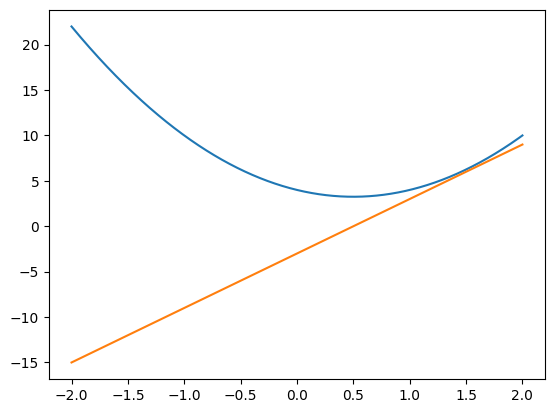

In [455]:
x = np.linspace(-2,2,2001)
plt.plot(x, fx(x), x, deriv(x))

[0.92]
[0.5]


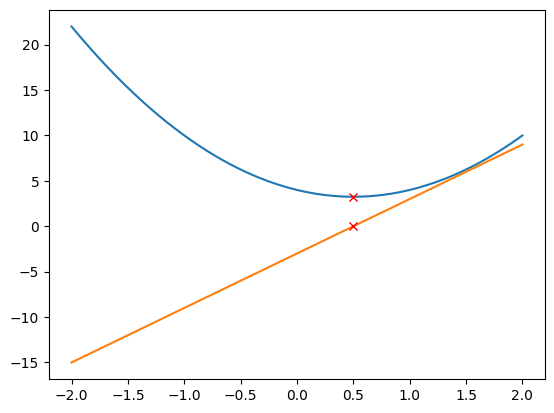

In [456]:
localmin = np.random.choice(x,1)
print(localmin)

learning_rate = .1
training_epochs = 100

for i in range(training_epochs):
    gradient = deriv(localmin)
    localmin = localmin - learning_rate*gradient
    
print(localmin)

plt.plot(x,fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), "rx")
plt.plot(localmin, fx(localmin), "rx")

In [457]:
localmin = np.random.choice(x)
print(localmin)

learning_rate = .033
training_epochs = 100

results = np.zeros([training_epochs, 2])
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin -= learning_rate*grad
    results[i][0] = localmin
    results[i][1] = grad
    
print(localmin)
print(results)

-1.246
0.49999999954345764
[[-9.00292000e-01 -1.04760000e+01]
 [-6.23034184e-01 -8.40175200e+00]
 [-4.00673416e-01 -6.73820510e+00]
 [-2.22340079e-01 -5.40404049e+00]
 [-7.93167436e-02 -4.33404048e+00]
 [ 3.53879716e-02 -3.47590046e+00]
 [ 1.27381153e-01 -2.78767217e+00]
 [ 2.01159685e-01 -2.23571308e+00]
 [ 2.60330067e-01 -1.79304189e+00]
 [ 3.07784714e-01 -1.43801960e+00]
 [ 3.45843341e-01 -1.15329172e+00]
 [ 3.76366359e-01 -9.24939956e-01]
 [ 4.00845820e-01 -7.41801845e-01]
 [ 4.20478348e-01 -5.94925080e-01]
 [ 4.36223635e-01 -4.77129914e-01]
 [ 4.48851355e-01 -3.82658191e-01]
 [ 4.58978787e-01 -3.06891869e-01]
 [ 4.67100987e-01 -2.46127279e-01]
 [ 4.73614992e-01 -1.97394078e-01]
 [ 4.78839223e-01 -1.58310050e-01]
 [ 4.83029057e-01 -1.26964660e-01]
 [ 4.86389304e-01 -1.01825658e-01]
 [ 4.89084222e-01 -8.16641774e-02]
 [ 4.91245546e-01 -6.54946703e-02]
 [ 4.92978928e-01 -5.25267256e-02]
 [ 4.94369100e-01 -4.21264339e-02]
 [ 4.95484018e-01 -3.37854000e-02]
 [ 4.96378183e-01 -2.7095890

In [458]:
np.random.choice(x)

np.float64(1.126)

In [459]:
np.zeros([training_epochs, 2])[0]

array([0., 0.])

In [460]:
localmin = np.random.rand()

epochs = 100
lr = 0.1
threshold = 0.001

for i in range(epochs):
    grad = deriv(localmin)
    if np.abs(grad) < threshold:
        print("Epoch: ", i, "\nGrad: ", grad)
        break
    localmin -= lr*grad

print(localmin)
    

Epoch:  7 
Grad:  -0.0005800228045704792
0.4999033295325716


## Code Challenge

In [461]:
def fx(x):
    return np.cos(np.pi*2*x) + x**2

def deriv(x):
    return -np.sin(2*np.pi*x)*np.pi + x

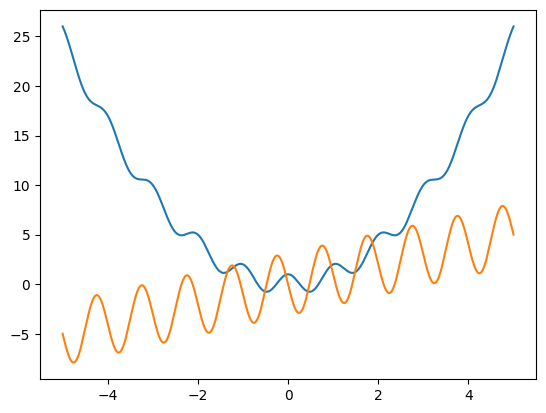

In [462]:
x = np.linspace(5,-5, 10000)
plt.plot(x,fx(x), x, deriv(x))

In [463]:
localmin = np.random.rand()

lr = 0.1
epochs = 10000

results = np.zeros([epochs, 2])
for i in range(epochs):
    grad = deriv(localmin)
    localmin -= lr*grad
    results[i,0] = localmin
    results[i, 1] = grad  
     
print(localmin)
print(results) 

0.535156647749779
[[ 0.41184853 -2.50518195]
 [ 0.53590652 -1.24057984]
 [ 0.41203897  1.23867547]
 ...
 [ 0.53515665 -1.22349115]
 [ 0.41280753  1.22349115]
 [ 0.53515665 -1.22349115]]


## Gradient Ascent

In [464]:
import sympy as sym 

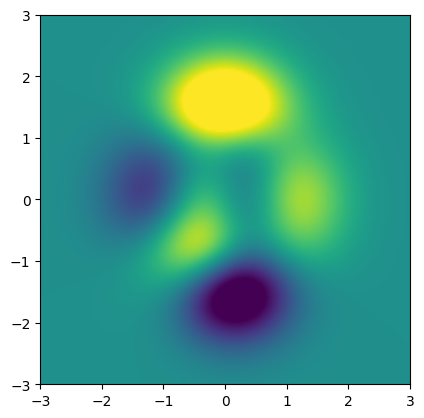

In [465]:
# the "peaks" function
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)
  
  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

# create the landscape
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [466]:
# create derivative functions using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

df_x(1,1).evalf()

-1.07369833656079

[0.228278920556369 -1.62553495750000]


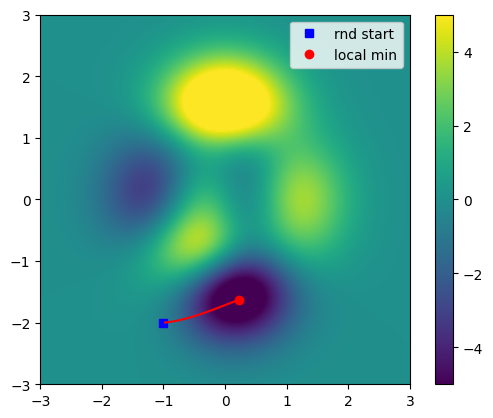

In [467]:
localmin = np.array([-1,-2])
startpnt = localmin.copy()

lr = 0.01
epochs = 1000
trajectory = np.zeros([epochs,2])

for i in range(epochs):
    grad = np.array([df_x(localmin[0], localmin[1]).evalf(),
                     df_y(localmin[0], localmin[1]).evalf()])
    localmin = localmin - lr*grad
    trajectory[i, :] = localmin

print(localmin)
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

[1.28567150123559 -0.00410818187631889]


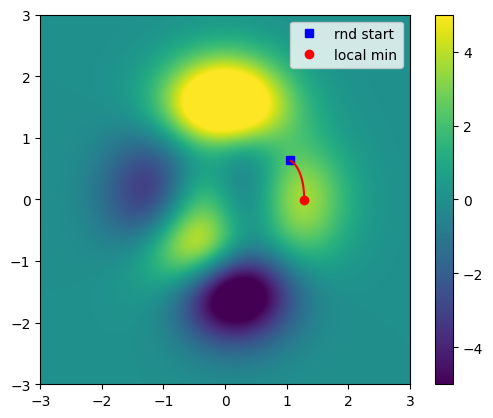

In [468]:
localmin = np.random.rand(2)*2
startpnt = localmin.copy()

lr = 0.01
epochs = 100
trajectory = np.zeros([epochs,2])

for i in range(epochs):
    grad = np.array([df_x(localmin[0], localmin[1]).evalf(),
                     df_y(localmin[0], localmin[1]).evalf()])
    localmin = localmin + lr*grad
    trajectory[i, :] = localmin

print(localmin)
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmin[0],localmin[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

## Parametric experiments

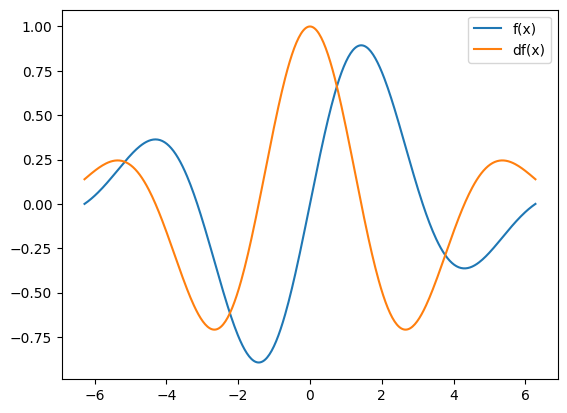

In [469]:
x = np.linspace(-2*np.pi, 2*np.pi, 401)
def fx(x):
    return np.sin(x) * np.exp(-x**2*.05)

def deriv(x):
    return np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05)

plt.plot(x,fx(x), x, deriv(x))
plt.legend(["f(x)", "df(x)"])

In [486]:
localmin = np.random.choice(x,1)
print(localmin)

learning_rate = .1
training_epochs = 100

for i in range(training_epochs):
    gradient = deriv(localmin)
    localmin = localmin - learning_rate*gradient
    
localmin

[-1.85353967]


array([-1.42888214])

## Code Challenge

[-1.438]
[0.5]


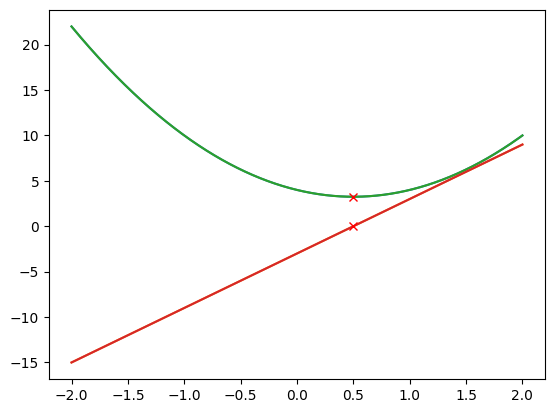

In [ ]:
def fx(x):
    return 3*x**2 - 3*x + 4

def deriv(x):
    return 6*x - 3

x = np.linspace(-2,2,2001)
plt.plot(x, fx(x), x, deriv(x))

localmin = np.random.choice(x,1)
print(localmin)

learning_rate = .2
training_epochs = 150

for i in range(training_epochs):
    gradient = deriv(localmin)
    localmin = localmin - learning_rate*gradient
    learning_rate *= (1- (i+1)/training_epochs)
    
    
print(localmin)

plt.plot(x,fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), "rx")
plt.plot(localmin, fx(localmin), "rx")